In [63]:
import numpy as np
import pandas as pd

In [64]:
df = pd.read_csv('placement.csv')

In [65]:
df


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [66]:
# since now we have read the data now we can do some basic anlaysis but first we need to determine what kind of anallysis
# is needed to have something meaningful
#  STEPS 

# 0. Preprocess + EDA(Exploratory Data Analysis) + Feature Engineering 
# 1. Extract the input and output cols
# 2. Scale the input data
# 3. Split the data into train and test sets
# 4. Train the model
# 5. Evaluate the model/ model selection
# 6. Deploy the model

In [ ]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [69]:
#checked for any null values but there aren't any
# there is no need for the 0th column named unanmed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)
# This will save the changes to the dataframe by removing the column 
#  we can also use df = df.iloc[:, 1:] to remove the first column

In [70]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [71]:
# now we will do some graphical analysis to see the distribution of the data and check for outliers possibly
import matplotlib.pyplot as plt

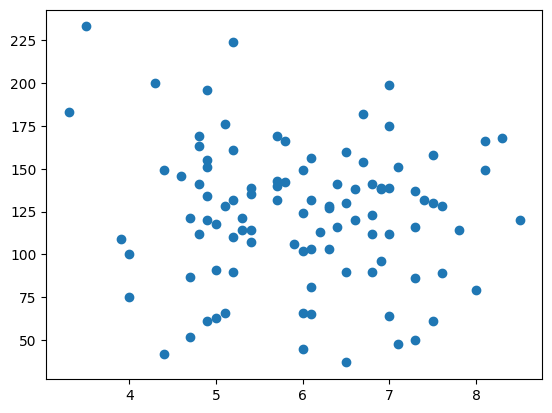

In [72]:
plt.scatter(df['cgpa'], df['iq']) # this will just plot the cgpa and iq columns

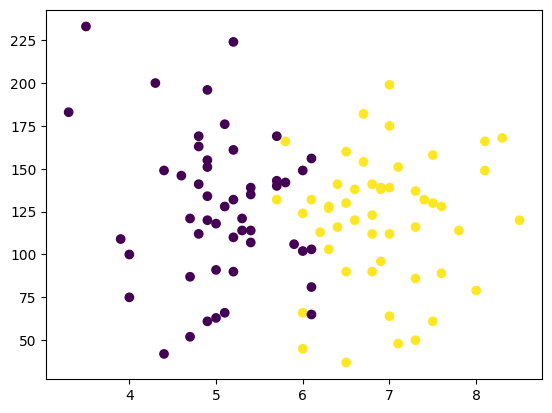

In [73]:
# Now when we can actually show how they are placed to actually idntify the trend of placement we need placement column to be a part of the data plotting
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])  
# Here the yellow color dtapoints are the ones of the placed ones

In [74]:
# We will use the logistic regeression model to predict the placement based on cgpa and iq which is basically a classification model
# it finds the best fit line to seperate the two classes of data points

In [75]:
#now there is not much to do in feature engineering since the data is already clean and also no need for any preprocessing
# Now we can seperate the input and output columns
X = df.iloc[:,:2] # input columns

In [76]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [77]:
Y = df['placement']# output column

In [78]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [79]:
# Now we will do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)  # 0.1 means 10% of the data will be split into test set (input, output, test_size = 0.1)

In [80]:
X_train

,cgpa,iq
66,6.9,96.0
2,5.3,121.0
90,7.3,86.0
75,4.8,169.0
61,7.3,137.0
...,...,...
73,4.9,61.0
24,4.7,121.0
35,6.8,90.0
63,6.3,128.0


In [81]:
Y_train

66    1
2     0
90    1
75    0
61    1
     ..
73    0
24    0
35    1
63    1
86    0
Name: placement, Length: 90, dtype: int64

In [82]:
X_test

,cgpa,iq
25,5.0,91.0
64,7.0,64.0
34,4.8,163.0
14,6.1,103.0
80,4.9,196.0
7,5.0,63.0
89,4.9,151.0
36,5.7,140.0
74,6.7,154.0
37,8.1,149.0


In [83]:
Y_test

25    0
64    1
34    0
14    0
80    0
7     0
89    0
36    0
74    1
37    1
Name: placement, dtype: int64

In [84]:
# Nnow we have to scale the values of the inout data
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train) # fit_transform will fit the scaler to the training data and then transform it

In [87]:
X_train

array([[ 0.7785183 , -0.68889844],
       [-0.62106516, -0.05468343],
       [ 1.12841417, -0.94258444],
       [-1.058435  ,  1.16300939],
       [ 1.12841417,  0.35121418],
       [ 0.95346624, -1.90659125],
       [-1.75822673, -1.22163904],
       [ 0.7785183 ,  0.37658278],
       [-0.5335912 , -0.40984383],
       [ 0.86599227,  0.40195138],
       [ 0.42862244, -2.18564585],
       [-0.97096103, -0.08005203],
       [ 0.2536745 ,  0.09752817],
       [-0.2711693 ,  0.22437118],
       [ 0.86599227,  1.9240674 ],
       [-0.09622136, -0.43521243],
       [ 1.3033621 , -1.57679945],
       [ 0.7785183 ,  0.40195138],
       [-0.2711693 ,  0.50342578],
       [-2.19559656,  2.78659981],
       [ 2.17810177, -0.08005203],
       [ 0.42862244,  0.93469199],
       [ 0.2536745 , -0.51131823],
       [-0.97096103,  0.80784898],
       [-1.40833086, -2.05880285],
       [ 0.42862244, -0.84111004],
       [ 1.12841417, -1.85585405],
       [ 2.00315384,  1.13764079],
       [-1.058435  ,

In [88]:
X_test = scaler.transform(X_test)

In [89]:
X_test 

array([[-0.88348706, -0.81574144],
       [ 0.86599227, -1.50069365],
       [-1.058435  ,  1.01079779],
       [ 0.07872657, -0.51131823],
       [-0.97096103,  1.8479616 ],
       [-0.88348706, -1.52606225],
       [-0.97096103,  0.70637458],
       [-0.2711693 ,  0.42731998],
       [ 0.60357037,  0.78248038],
       [ 1.8282059 ,  0.65563738]])

If you did fit_transform() on the test set:
You’d be leaking information from the test data into the model.

This gives you unrealistic performance during evaluation — because you're indirectly “seeing” the test set before prediction.



In [90]:
# Now we will train the model using logistic regression
from sklearn.linear_model import LogisticRegression

In [91]:
clf = LogisticRegression()

In [92]:
clf.fit(X_train, Y_train) #model will be trained on the training data

LogisticRegression()

In [95]:
y_pred = clf.predict(X_test) # this will predict the output for the test data

In [94]:
Y_test

25    0
64    1
34    0
14    0
80    0
7     0
89    0
36    0
74    1
37    1
Name: placement, dtype: int64

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred) # this will give the accuracy of the model on the test data

0.9

In [97]:
#this means our model has the accuracy of 90% which is pretty good its hard to tell if its overfiting or not since we have a small dataset
# Now we can use the model to predict the placement of a new student
#  Now to visualize which decision boundary the model has made we can plot the decision boundary
# since we are beginner we will be usig a library for this now 
from mlxtend.plotting import plot_decision_regions

<Axes: >

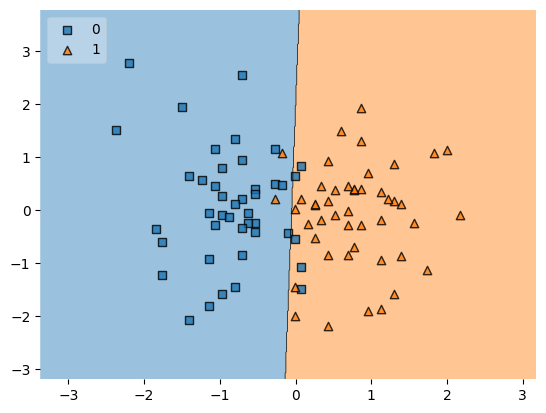

In [98]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend = 2)

In [ ]:
import pickle # this is a library to save the model to a file

In [100]:
pickle.dump(clf, open('placement_model.pkl', 'wb')) # this will save the model to a file named placement_model.pkl

In [101]:
pickle.dump(scaler, open('scaler.pkl', 'wb')) # this will save the scaler to a file named scaler.pkl